Loading data


In [15]:
import pandas as pd


Taking all files in a list

In [16]:
import glob
all_files=[]
for csv in glob.glob("/content/drive/MyDrive/ML Project/*.csv"):
    all_files.append(csv)


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Removing file with unmatched number of columns

In [17]:
all_files.remove("/content/drive/MyDrive/ML Project/unclean cclass.csv")
all_files.remove("/content/drive/MyDrive/ML Project/unclean focus.csv")

In [18]:
dfall=[]
for i in range(len(all_files)):
  dfall.append(pd.read_csv(all_files[i]))
  name=all_files[i][34:-4]
  dfall[i]["type"] = name
#dfall

In [19]:
#taking same column dfs
dfall = [x for x in dfall if not len(x.columns) != 10]
#setting same name for columns
col_names=list(dfall[0].columns)
for i in dfall:
  i.columns=col_names

#merge all into one single df

final_df=pd.DataFrame()
for i in dfall:
  final_df=final_df.append(i)


In [28]:
#final_df.index=len(final_df)
final_df.index=list(range(len(final_df)))
print(final_df.describe())
#final_df.info()

               year          price  ...           mpg    engineSize
count  98958.000000   98958.000000  ...  98958.000000  98958.000000
mean    2017.097536   16789.626680  ...     55.037750      1.659525
std        2.103578    9834.268177  ...     13.582532      0.545236
min     1970.000000     450.000000  ...      0.300000      0.000000
25%     2016.000000    9999.000000  ...     47.100000      1.200000
50%     2017.000000   14491.000000  ...     54.300000      1.600000
75%     2019.000000   20800.000000  ...     62.800000      2.000000
max     2020.000000  159999.000000  ...    256.800000      6.600000

[8 rows x 6 columns]


In [21]:
#year maximum value is 2060,remove that record
final_df["year"].unique()
final_df=final_df[final_df["year"]<=2020]
#final_df

Checking Boxplots

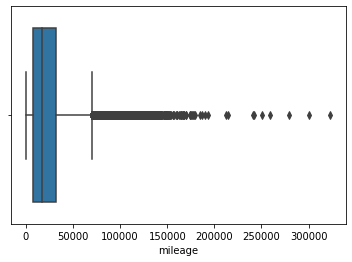

In [ ]:
import seaborn as sns
mileage_box = sns.boxplot(x = 'mileage', data =final_df)

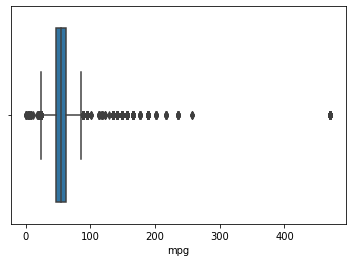

In [ ]:
mpg_box = sns.boxplot(x = 'mpg', data =final_df)

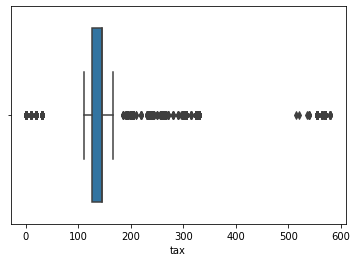

In [ ]:
tax_box = sns.boxplot(x = 'tax', data =final_df)

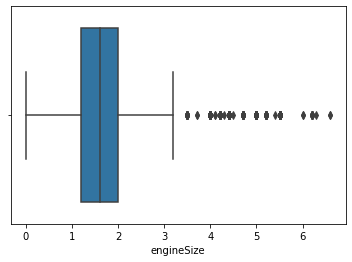

In [ ]:
engine_box = sns.boxplot(x = 'engineSize', data =final_df)

Removing outliers

In [22]:
final_df=final_df[final_df["mileage"]<=200000]
final_df=final_df[final_df["mpg"]<=300]
final_df=final_df[final_df["tax"]<=400]
#final_df=final_df[final_df["tax"]>=50]

Boxplots after removing outliers

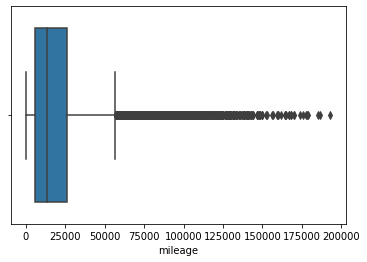

In [ ]:
mileage_box = sns.boxplot(x = 'mileage', data =final_df)

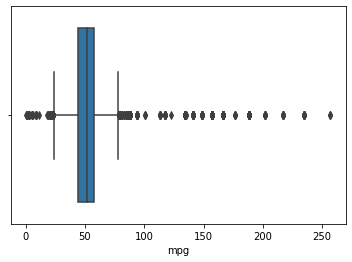

In [ ]:
mpg_box = sns.boxplot(x = 'mpg', data =final_df)

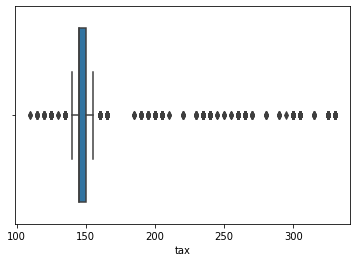

In [ ]:
tax_box = sns.boxplot(x = 'tax', data =final_df)

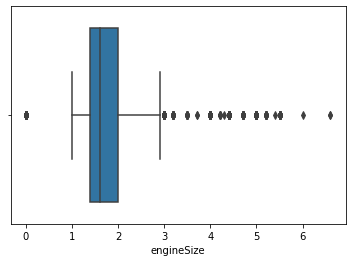

In [ ]:
engine_box = sns.boxplot(x = 'engineSize', data =final_df)

Correlation between features

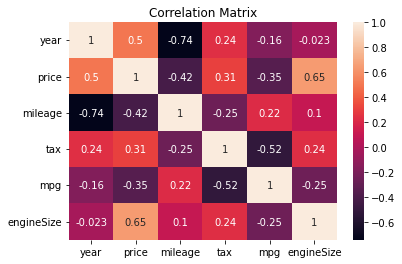

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(final_df.corr(),annot = True)
plt.title("Correlation Matrix")
plt.show()

Pairplot

In [ ]:
sns.pairplot(final_df)
plt.show()

Encoding the categorical attributes using One Hot Encoding


In [11]:
pip install category_encoders

     |████████████████████████████████| 82 kB 260 kB/s 


In [23]:
import sklearn
from sklearn import preprocessing

final_df_encoded = final_df.copy()
onehot_encoded_df=pd.get_dummies(final_df_encoded, columns = ['model','transmission','fuelType','type'])

onehot_encoded_df

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ A Class,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Accent,model_ Adam,model_ Agila,model_ Amarok,model_ Amica,model_ Ampera,model_ Antara,model_ Arteon,model_ Astra,model_ Auris,model_ Avensis,model_ Aygo,model_ B Class,model_ B-MAX,model_ Beetle,model_ C Class,model_ C-HR,...,model_ Verso-S,model_ Viva,model_ Vivaro,model_ X-CLASS,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Yaris,model_ Yeti,model_ Yeti Outdoor,model_ Z3,model_ Z4,model_ Zafira,model_ Zafira Tourer,model_ i8,model_180,model_200,model_220,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,type_audi,type_bmw,type_ford,type_hyundi,type_merc,type_skoda,type_toyota,type_vauxhall,type_vw
0,2019,25000,13904,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2019,26883,4562,145,49.6,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2019,20000,7414,145,50.4,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2019,33492,4825,145,32.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,2019,22900,6500,150,39.8,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,2016,8680,25906,0,78.4,1.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99183,2015,7830,59508,30,65.7,1.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99184,2017,6830,13810,20,60.1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99185,2018,13994,23313,145,44.8,1.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


normalizing the data

In [24]:
from sklearn.preprocessing import StandardScaler

normalized_data=onehot_encoded_df.copy()
columns=["year", "mileage", "tax", "mpg", "engineSize"]
for c in columns:
  normalized_data[c]=(normalized_data[c]-normalized_data[c].min())/(normalized_data[c].max()-normalized_data[c].min())

normalized_data

,year,price,mileage,tax,mpg,engineSize,model_ 1 Series,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ 7 Series,model_ 8 Series,model_ A Class,model_ A1,model_ A2,model_ A3,model_ A4,model_ A5,model_ A6,model_ A7,model_ A8,model_ Accent,model_ Adam,model_ Agila,model_ Amarok,model_ Amica,model_ Ampera,model_ Antara,model_ Arteon,model_ Astra,model_ Auris,model_ Avensis,model_ Aygo,model_ B Class,model_ B-MAX,model_ Beetle,model_ C Class,model_ C-HR,...,model_ Verso-S,model_ Viva,model_ Vivaro,model_ X-CLASS,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ X6,model_ X7,model_ Yaris,model_ Yeti,model_ Yeti Outdoor,model_ Z3,model_ Z4,model_ Zafira,model_ Zafira Tourer,model_ i8,model_180,model_200,model_220,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,type_audi,type_bmw,type_ford,type_hyundi,type_merc,type_skoda,type_toyota,type_vauxhall,type_vw
0,0.98,25000,0.072037,0.439394,0.192203,0.303030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.98,26883,0.023632,0.439394,0.192203,0.303030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.98,20000,0.038410,0.439394,0.195322,0.303030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.98,33492,0.024995,0.439394,0.125536,0.303030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0.98,22900,0.033674,0.454545,0.153996,0.227273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99182,0.92,8680,0.134223,0.000000,0.304483,0.242424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99183,0.90,7830,0.308328,0.090909,0.254971,0.257576,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
99184,0.94,6830,0.071550,0.060606,0.233138,0.151515,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
99185,0.96,13994,0.120788,0.439394,0.173489,0.242424,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


splitting the data into train test

In [25]:
from sklearn.model_selection import train_test_split

normalized_data=onehot_encoded_df
x_train, x_test, y_train, y_test = train_test_split(
     normalized_data.drop(['price'],axis=1), normalized_data['price'], test_size=0.20, random_state=42)

Adaboost regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
adaboost_reg = AdaBoostRegressor(random_state=0)
adaboost_reg.fit(x_train, y_train)

print('adaboost Regressor Train Score is : ' , adaboost_reg.score(x_train, y_train))
print('adaboost Regressor Test Score is : ' , adaboost_reg.score(x_test, y_test))

print('\nadaboost Regressor Train MSE is : ' , mean_squared_error(adaboost_reg.predict(x_train),y_train))
print('adaboost Regressor Test MSE is : ' , mean_squared_error(adaboost_reg.predict(x_test),y_test))

print('\nadaboost Regressor R2 score is : ' , r2_score(adaboost_reg.predict(x_train),y_train))
print('adaboost Regressor Test R2 score is : ' , r2_score(adaboost_reg.predict(x_test),y_test))

Grid Search for optimal parameters

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor

n_estimators =list(range(50,100,10))
learning_rate=[0.001, 0.01, 0.1, 1.0]
loss = ['linear','square','exponential']

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'loss': loss
               }

adaboost_reg = AdaBoostRegressor()
adaboost_random = RandomizedSearchCV(estimator = adaboost_reg, param_distributions = random_grid, n_iter = 10,random_state=42,cv=2)
adaboost_random.fit(x_train,y_train)

adaboost_random.best_params_


{'learning_rate': 0.1, 'loss': 'linear', 'n_estimators': 80}

After Grid Search

In [26]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
adaboost_reg = AdaBoostRegressor(n_estimators=80,learning_rate=0.1,loss='linear',random_state=0)
adaboost_reg.fit(x_train, y_train)

print('adaboost Regressor Train Score is : ' , adaboost_reg.score(x_train, y_train))
print('adaboost Regressor Test Score is : ' , adaboost_reg.score(x_test, y_test))

print('\nadaboost Regressor Train MSE is : ' , mean_squared_error(adaboost_reg.predict(x_train),y_train))
print('adaboost Regressor Test MSE is : ' , mean_squared_error(adaboost_reg.predict(x_test),y_test))

print('\nadaboost Regressor R2 score is : ' , r2_score(adaboost_reg.predict(x_train),y_train))
print('adaboost Regressor Test R2 score is : ' , r2_score(adaboost_reg.predict(x_test),y_test))

adaboost Regressor Train Score is :  0.6466367033528434
adaboost Regressor Test Score is :  0.6466457672746431

adaboost Regressor Train MSE is :  34390664.8890632
adaboost Regressor Test MSE is :  33308567.616176102

adaboost Regressor R2 score is :  0.41845434507677226
adaboost Regressor Test R2 score is :  0.4442897142130575


Plotting Actual v/s Predicted Graph

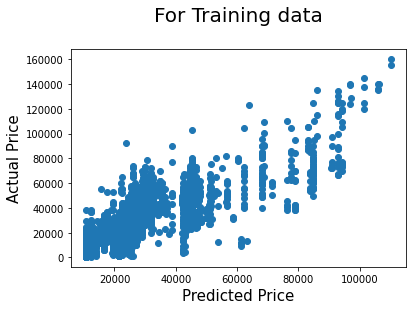

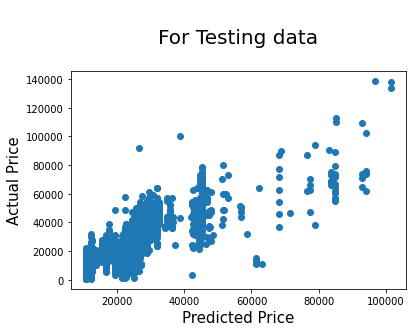

In [27]:
import matplotlib.pyplot as plt
 
y_pred_test=adaboost_reg.predict(x_test)
y_pred_train=adaboost_reg.predict(x_train)

plt.scatter(y_pred_train,y_train)
plt.title("For Training data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()

plt.scatter(y_pred_test,y_test)
plt.title("\nFor Testing data\n",fontsize=20)
plt.xlabel('Predicted Price',fontsize=15)
plt.ylabel('Actual Price',fontsize=15)
plt.show()